# Exercise 03

Integrante 1: Andrea Carolina Parra_________________ 	Código: 201727740_____________ 

Integrante 2: Ricardo Andrés Medina________________ 	Código: 201628949_____________ 


## Data preparation and model evaluation exercise with credit scoring

Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit. 

Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. This competition requires participants to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years. [Dataset](https://www.kaggle.com/c/GiveMeSomeCredit)

Attribute Information:

|Variable Name	|	Description	|	Type|
|----|----|----|
|SeriousDlqin2yrs	|	Person experienced 90 days past due delinquency or worse 	|	Y/N|
|RevolvingUtilizationOfUnsecuredLines	|	Total balance on credit divided by the sum of credit limits	|	percentage|
|age	|	Age of borrower in years	|	integer|
|NumberOfTime30-59DaysPastDueNotWorse	|	Number of times borrower has been 30-59 days past due |	integer|
|DebtRatio	|	Monthly debt payments	|	percentage|
|MonthlyIncome	|	Monthly income	|	real|
|NumberOfOpenCreditLinesAndLoans	|	Number of Open loans |	integer|
|NumberOfTimes90DaysLate	|	Number of times borrower has been 90 days or more past due.	|	integer|
|NumberRealEstateLoansOrLines	|	Number of mortgage and real estate loans	|	integer|
|NumberOfTime60-89DaysPastDueNotWorse	|	Number of times borrower has been 60-89 days past due |integer|
|NumberOfDependents	|	Number of dependents in family	|	integer|


Read the data into Pandas

In [41]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import zipfile
with zipfile.ZipFile('../datasets/KaggleCredit2.csv.zip', 'r') as z:
    f = z.open('KaggleCredit2.csv')
    data = pd.io.parsers.read_table(f, sep=',')

data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,1,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,2,0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,4,0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [42]:
y = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)

# Exercise 3.1

Input the missing values of the Age and Number of Dependents 

In [43]:
data.isnull().sum()

Unnamed: 0                                 0
SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                     4267
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      4267
dtype: int64

In [44]:
data.shape

(112915, 12)

In [45]:
data.age.mean()

51.36130439584714

In [46]:
data.age.median()

51.0

In [47]:
data.loc[data.age.isnull()]

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
55,55,0,0.004264,NaN,0.0,0.111444,2000.0,6.0,1.0,0.0,0.0,NaN
60,60,0,0.234218,NaN,0.0,0.116614,8600.0,19.0,0.0,0.0,0.0,NaN
77,77,0,0.363200,NaN,0.0,0.480524,2900.0,4.0,0.0,1.0,0.0,NaN
117,117,0,0.000000,NaN,2.0,0.370876,3000.0,14.0,0.0,1.0,0.0,NaN
126,126,0,0.000000,NaN,1.0,0.726567,3477.0,5.0,0.0,1.0,0.0,NaN
138,138,0,0.000000,NaN,0.0,0.907539,2400.0,6.0,0.0,1.0,0.0,NaN
155,155,0,0.078739,NaN,0.0,0.166215,4800.0,6.0,0.0,1.0,0.0,NaN
162,162,0,1.000000,NaN,1.0,0.358101,1937.0,4.0,1.0,0.0,0.0,NaN
163,163,0,0.013501,NaN,0.0,0.183464,19000.0,8.0,0.0,1.0,0.0,NaN
193,193,0,0.012151,NaN,0.0,0.008887,4500.0,12.0,0.0,0.0,0.0,NaN


In [48]:
data.age.fillna(data.age.mean(), inplace=True)

In [49]:
data.age.describe()

count    112915.000000
mean         51.361304
std          14.177842
min           0.000000
25%          41.000000
50%          51.361304
75%          61.000000
max         103.000000
Name: age, dtype: float64

In [50]:
data.isnull().sum()

Unnamed: 0                                 0
SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                        0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      4267
dtype: int64

In [51]:
data.NumberOfDependents.mean()

0.8565735218319711

In [52]:
data.NumberOfDependents.median()

0.0

In [53]:
data.NumberOfDependents.describe()

count    108648.000000
mean          0.856574
std           1.149537
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          20.000000
Name: NumberOfDependents, dtype: float64

In [54]:
data.NumberOfDependents.fillna(data.age.mean(), inplace=True)

In [55]:
data.isnull().sum()

Unnamed: 0                              0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

# Exercise 3.2

From the set of features

Select the features that maximize the **F1Score** the model using K-Fold cross-validation

In [99]:
y = data['SeriousDlqin2yrs']
X = data.drop(['SeriousDlqin2yrs'], axis=1)
X.head()


,Unnamed: 0,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,1,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,2,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,3,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,4,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [100]:
# list of values to try for max_features
feature_cols = X.columns[X.columns.str.startswith('C') == False]
feature_cols

Index(['Unnamed: 0', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [101]:
from sklearn.ensemble import RandomForestClassifier
rfreg = RandomForestClassifier()
rfreg

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [114]:
# list of values to try for n_estimators

import  numpy  as  np
from sklearn.model_selection import cross_val_score
estimator_range = range(10, 210, 20)

# list to store the average RMSE for each value of n_estimators
F1_scores = []

for estimator in estimator_range:
    rfreg = RandomForestClassifier(n_estimators=estimator, random_state=1, n_jobs=-1)
    f1_scores = cross_val_score(rfreg, X, y, cv=3, scoring='f1')
    F1_scores.append(np.mean(f1_scores))


Text(0,0.5,'F1(Alto es mejor)')

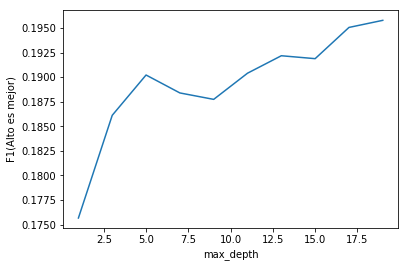

In [115]:
# plot max_depth (x-axis) versus RMSE (y-axis)
import matplotlib.pyplot as plt
max_depth_range = range(1, 21,2)
plt.plot(max_depth_range, F1_scores)
plt.xlabel('max_depth')
plt.ylabel('F1(Alto es mejor)')

In [116]:

feature_range = range(1, len(feature_cols)+1)

# list to store the average RMSE for each value of max_features
F1_scores = []

# use 10-fold cross-validation with each value of max_features (WARNING: SLOW!)
for feature in feature_range:
    rfreg = RandomForestClassifier(n_estimators=150, max_features=feature, random_state=1, n_jobs=-1)
    f1_scores = cross_val_score(rfreg, X, y, cv=10, scoring='f1')
    F1_scores.append(np.mean(f1_scores))


Text(0,0.5,'F1(Alto es mejor)')

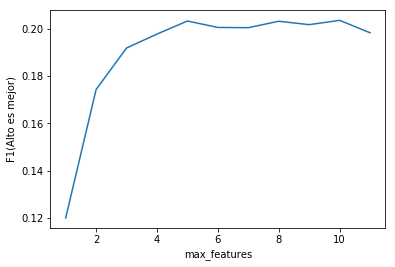

In [118]:
plt.plot(feature_range, F1_scores)
plt.xlabel('max_features')
plt.ylabel('F1(Alto es mejor)')

In [130]:
# max_features=8 is best and n_estimators=150 is sufficiently large# max_f 
rfreg = RandomForestClassifier(n_estimators=150, max_features=5, max_depth=5, oob_score=True, random_state=1)
rfreg.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=True, random_state=1, verbose=0, warm_start=False)

In [131]:
# compute feature importances
pd.DataFrame({'feature':feature_cols, 'importance':rfreg.feature_importances_}).sort_values('importance')

,feature,importance
10,NumberOfDependents,0.001120
8,NumberRealEstateLoansOrLines,0.001560
0,Unnamed: 0,0.003482
5,MonthlyIncome,0.004928
6,NumberOfOpenCreditLinesAndLoans,0.004982
2,age,0.008748
4,DebtRatio,0.012435
3,NumberOfTime30-59DaysPastDueNotWorse,0.125295
9,NumberOfTime60-89DaysPastDueNotWorse,0.168377
1,RevolvingUtilizationOfUnsecuredLines,0.205266


Las variables que logran maximizar el F1 score son NumberOfTimes90DaysLate, RevolvingUtilizationOfUnsecuredLines, NumberOfTime60-89DaysPastDueNotWorse, 	NumberOfTime30-59DaysPastDueNotWorse  y DebtRatio

# Exercise 3.3

Now which is the best set of features selected by AUC

In [133]:

feature_range = range(1, len(feature_cols)+1)

# list to store the average RMSE for each value of max_features
AC_scores = []

# use 10-fold cross-validation with each value of max_features (WARNING: SLOW!)
for feature in feature_range:
    rfreg = RandomForestClassifier(n_estimators=150, max_features=feature, random_state=1, n_jobs=-1)
    ac_scores = cross_val_score(rfreg, X, y, cv=10, scoring='accuracy')
    AC_scores.append(np.mean(ac_scores))


Text(0,0.5,'AC(Alto es mejor)')

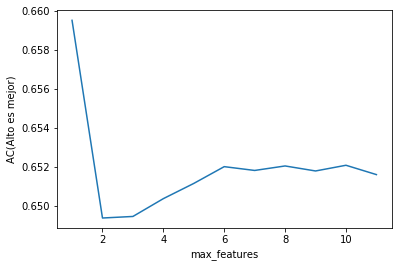

In [134]:
# plot max_features (x-axis) 
plt.plot(feature_range, AC_scores)
plt.xlabel('max_features')
plt.ylabel('AC(Alto es mejor)')

In [138]:
# max_features=8 is best and n_estimators=150 is sufficiently large# max_f 
rfreg = RandomForestClassifier(n_estimators=150, max_features=6, max_depth=5, oob_score=True, random_state=1)
rfreg.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=6, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=True, random_state=1, verbose=0, warm_start=False)

In [139]:
# compute feature importances
pd.DataFrame({'feature':feature_cols, 'importance':rfreg.feature_importances_}).sort_values('importance')

,feature,importance
10,NumberOfDependents,0.001003
8,NumberRealEstateLoansOrLines,0.001188
0,Unnamed: 0,0.003894
6,NumberOfOpenCreditLinesAndLoans,0.004580
5,MonthlyIncome,0.004704
2,age,0.006909
4,DebtRatio,0.012775
3,NumberOfTime30-59DaysPastDueNotWorse,0.112149
9,NumberOfTime60-89DaysPastDueNotWorse,0.178978
1,RevolvingUtilizationOfUnsecuredLines,0.188448


Las variables que logran maximizar el F1 score son NumberOfTimes90DaysLate, RevolvingUtilizationOfUnsecuredLines, NumberOfTime60-89DaysPastDueNotWorse, 	NumberOfTime30-59DaysPastDueNotWorse, DebtRatio y age.